### 2.157 Fields of study for college students.

##### (a) Calculate the marginal totals and add them to the table.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.style.use('ggplot')

df_2  = pd.read_csv('ex02-157fos.csv')

#Total sum per column: 
df_2.loc['Total',1:]= df_2.sum(axis=0,numeric_only=True)

#Total sum per row: 
df_2.loc[:,'Total'] = df_2.sum(axis=1,numeric_only=True)
df_2

,Field,Canada,France,Germany,Italy,Japan,UK,US,Total
0,SsBL,64.0,153.0,66.0,125.0,250.0,152.0,878.0,1688.0
1,SME,35.0,111.0,66.0,80.0,136.0,128.0,355.0,911.0
2,AH,27.0,74.0,33.0,42.0,123.0,105.0,397.0,801.0
3,Ed,20.0,45.0,18.0,16.0,39.0,14.0,167.0,319.0
4,Other,30.0,289.0,35.0,58.0,97.0,76.0,272.0,857.0
Total,NaN,176.0,672.0,218.0,321.0,645.0,475.0,2069.0,4576.0


##### b) Find the marginal distribution of country and give a graphical display of the distribution.

In [44]:
df_3 = df_2.iloc[[-1]].drop('Field', 1)
df_3 = df_3.iloc[:, 0:-1].divide(df_3.iloc[:,-1], axis = 'rows')*100
df_3

,Canada,France,Germany,Italy,Japan,UK,US
Total,3.846154,14.685315,4.763986,7.01486,14.09528,10.380245,45.214161


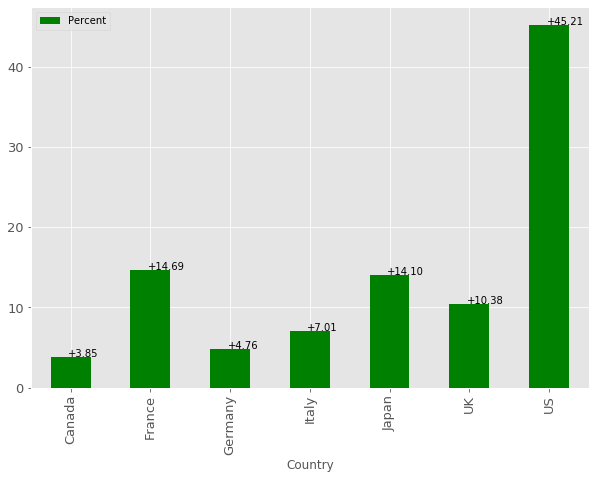

In [46]:
actual = df_3.T.reset_index().rename(columns={'Total':'Percent','index':'Country'})
ax = actual.plot(kind='bar',x="Country",figsize=(10,7),color="green", fontsize=13);

ax.set_alpha(0.8)

x_offset = -0.03
y_offset = 0.02 

for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))


##### (c) Do the same for the marginal distribution of field of study.

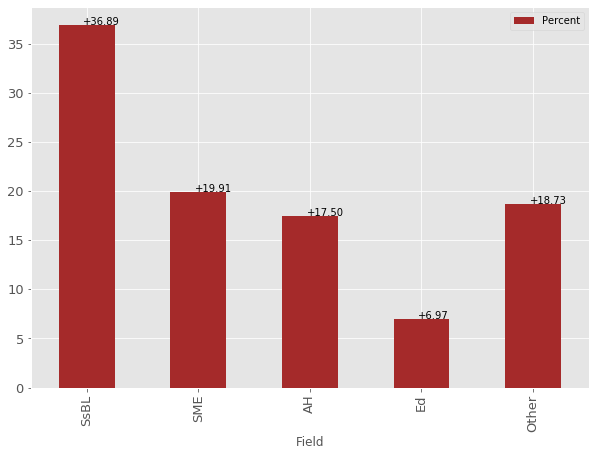

In [51]:
df_2['Percent'] = df_2.iloc[0:-1,::8]['Total'].div(df_2["Total"].iloc[-1]) * 100
ax = df_2.iloc[0:-1,::9].plot(kind='bar',x="Field",y='Percent',figsize=(10,7),color="brown", fontsize=13);

ax.set_alpha(0.8)

x_offset = -0.03
y_offset = 0.02 

for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

### 2.162 Salaries and raises.

##### (a) Figure 2.34 is a scatterplot of salary versus year, with the least-squares regression line. Describe the relationship between salary and year for this person.


In [56]:
print('(a) The figure showa positive, strong, and curved relationship between employment years and salary. \n Therefore the salary is more for the person who worked has more experience.')


(a) The figure showa positive, strong, and curved relationship between employment years and salary. 
 Therefore the salary is more for the person who worked has more experience.


##### (b) The value of r2 for these data is 0.9832. What percent of the variation in salary is explained by year? Would you say that this is an indication of a strong linear relationship? Explain your answer.

In [58]:
print('(b) r2 is 0.9832 i.e. percent of the variation - 98%. The percentage is high and describe a strong relationship between salary and years. Residual will have lower distance as r2 is higher.')

(b) r2 is 0.9832 i.e. percent of the variation - 98%. The percentage is high and describe a strong relationship between salary and years. Residual will have lower distance as r2 is higher.


### 2.163 Look at the residuals.

##### (a) Interpret the residual plot.

In [60]:
print('The residuals are positive at both the ends. The negative in the middle suggests a better fit for a nonlinear model and the given figure has curved relationship.')

The residuals are positive at both the ends. The negative in the middle suggests a better fit for a nonlinear model and the given figure has curved relationship.


##### (b) Explain how this plot highlights the deviations from the least-squares regression line that you can see in Figure 2.34.

In [63]:
print('Residual points should be random but here we can see, fitted values near 6 to 14 tend to be negative.\n Which indicates some independent variables do not capture the entire deterministic component and causes errors.\n Deviations from the least-squares regression indicates it has a curved relationship between years and salary.')

Residual points should be random but here we can see, fitted values near 6 to 14 tend to be negative.
 Which indicates some independent variables do not capture the entire deterministic component and causes errors.
 Deviations from the least-squares regression indicates it has a curved relationship between years and salary.


### 2.166 Faculty salaries.

##### (a) Construct a scatterplot with the 2013–2014 salaries on the vertical axis and the 2012–2013 salaries on the horizontal axis.

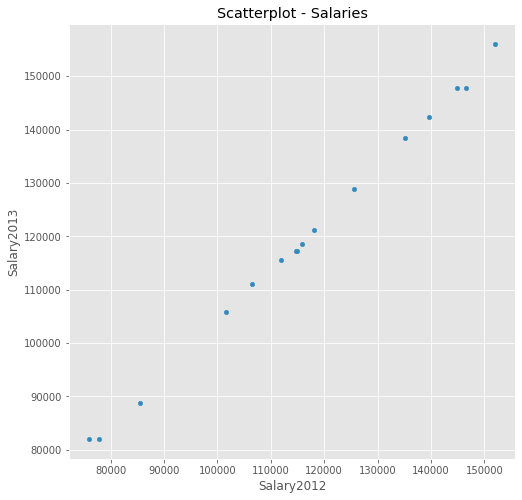

In [66]:
df = pd.read_csv('ex02-166faculty.csv')
df.plot(kind='scatter',x='Salary2012',y='Salary2013',title='Scatterplot - Salaries')

###### (b) Comment on the form, direction, and strength of the relationship in your scatterplot.

In [68]:
print('From the above graph, we can see strong, positive, and linear relationships.')

From the above graph, we can see strong, positive, and linear relationships.


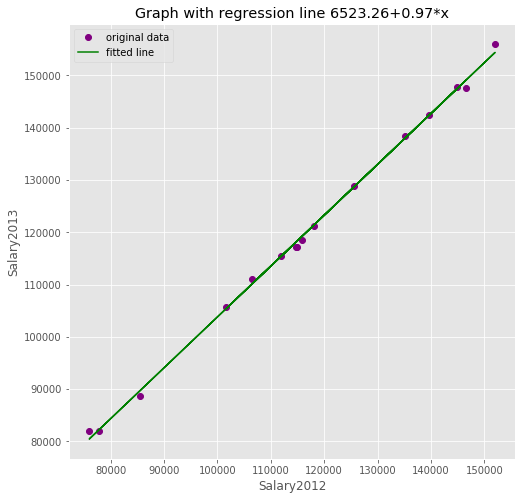

In [71]:
x = df['Salary2012']
y = df['Salary2013']
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.plot(x, y, 'o', label='original data',color='purple')

plt.plot(x, intercept + slope*x, 'r', label='fitted line',color='green')
plt.title(f"Graph with regression line {round(intercept, 2)}+{round(slope,2)}*x")
plt.xlabel('Salary2012')
plt.ylabel('Salary2013')
plt.legend()
plt.show()

##### (c) What proportion of the variation in 2013–2014 salaries is explained by 2012–2013 salaries?

In [74]:
print((r_value**2)*100,'%')

99.8413693006626 %


### 2.177 Class size and class level.

##### Solution 

If we breakdown it to year bases and consider students who are in third and fourth years as upper level, it looks like when Dean aggregates numbers, in first and second year Department A has more students in small classes that's why numbers are not exactly telling true story.

If we breakdown numbers for only the upper level, we can see that on upper-level data, Department A has around 77%(31/40) students in small class while Department B has around 83%(30/36).

Also, in upper-level, Department A has around 79%(40/52) students compared to B has around 34%(36/106) students.

###### I have attached an excel file for the graphs and calculations.